In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('SalesData.csv')
df

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946
...,...,...
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   105 non-null    object
 1   Sales   105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [4]:
## Convert Months column into Datetime
df['Month'] = pd.to_datetime(df['Month'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   Sales   105 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


In [6]:
#set the index 
df.set_index('Month', inplace=True)
df.head()

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


<AxesSubplot:xlabel='Month'>

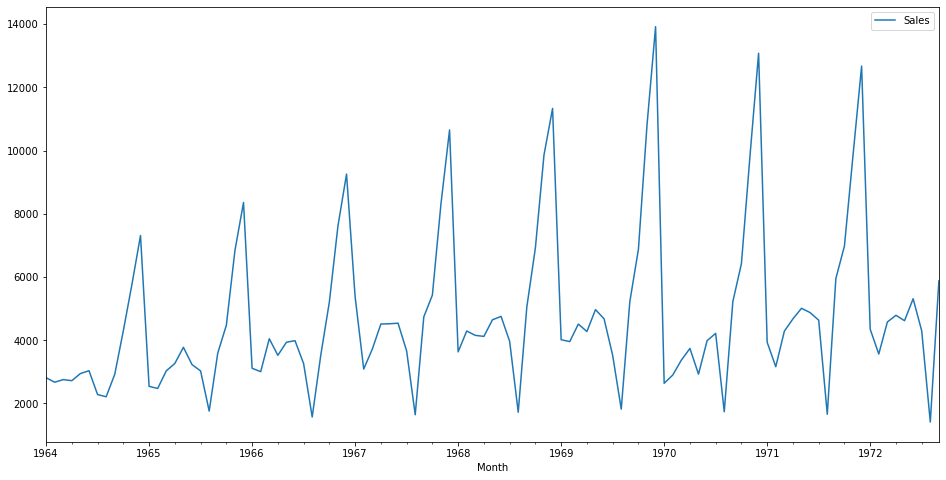

In [7]:
#plot

df.plot(figsize=(16,8))

In [8]:
## As per visulization we can say data has Trend, seasonality

## let check stationary or non-stationary

Augmented Dickey-Fuller unit root test.

In [9]:
from statsmodels.tsa.stattools import adfuller 

In [10]:
adfuller(df['Sales'])

(-1.8335930563276297,
 0.3639157716602417,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [11]:
def adfuller_test(data):
    result= adfuller(data)
    labels = ['ADF Test Statistic', 'p-value', 'Number of Lags Used','Number of Observations Used', 'Critical values', 'Autolag']
    for value, label in zip(result, labels):
        print(label+': '+str(value))
    
    if result[1] <= 0.05:
        print("\n strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("\n Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        

In [12]:
adfuller_test(df['Sales'])

ADF Test Statistic: -1.8335930563276297
p-value: 0.3639157716602417
Number of Lags Used: 11
Number of Observations Used: 93
Critical values: {'1%': -3.502704609582561, '5%': -2.8931578098779522, '10%': -2.583636712914788}
Autolag: 1478.4633060594724

 Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [13]:
# Use "diff" to convert non-stationary to stationary

df['Sales_First_Difference'] = df['Sales'] - df['Sales'].shift(1)

In [14]:
adfuller_test(df['Sales_First_Difference'].dropna())

ADF Test Statistic: -7.1898964480510195
p-value: 2.519620447386778e-10
Number of Lags Used: 11
Number of Observations Used: 92
Critical values: {'1%': -3.503514579651927, '5%': -2.893507960466837, '10%': -2.583823615311909}
Autolag: 1466.8267262915888

 strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

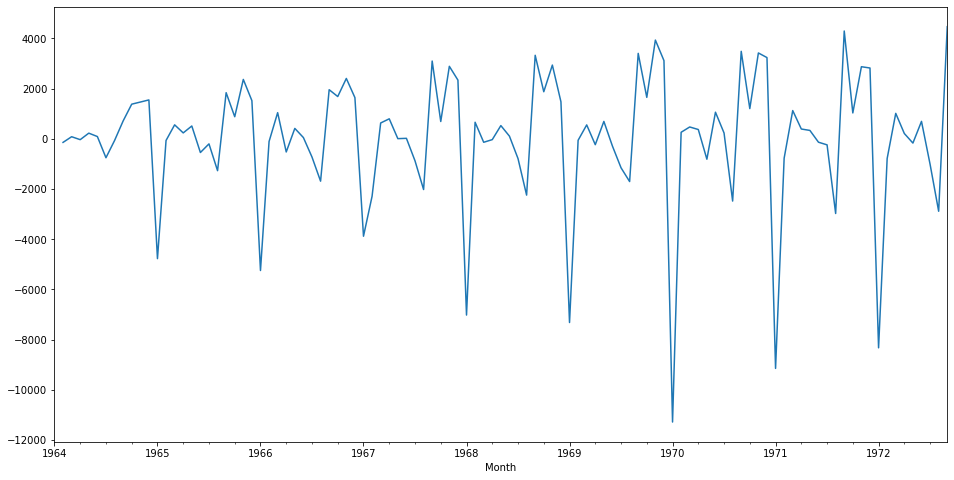

In [15]:
df['Sales_First_Difference'].plot(figsize=(16,8))

In [16]:
df['Sales_12_Difference'] = df['Sales'] - df['Sales'].shift(12)

In [17]:
adfuller_test(df['Sales_12_Difference'].dropna())

ADF Test Statistic: -7.626619157213163
p-value: 2.060579696813685e-11
Number of Lags Used: 0
Number of Observations Used: 92
Critical values: {'1%': -3.503514579651927, '5%': -2.893507960466837, '10%': -2.583823615311909}
Autolag: 1294.7753384560438

 strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

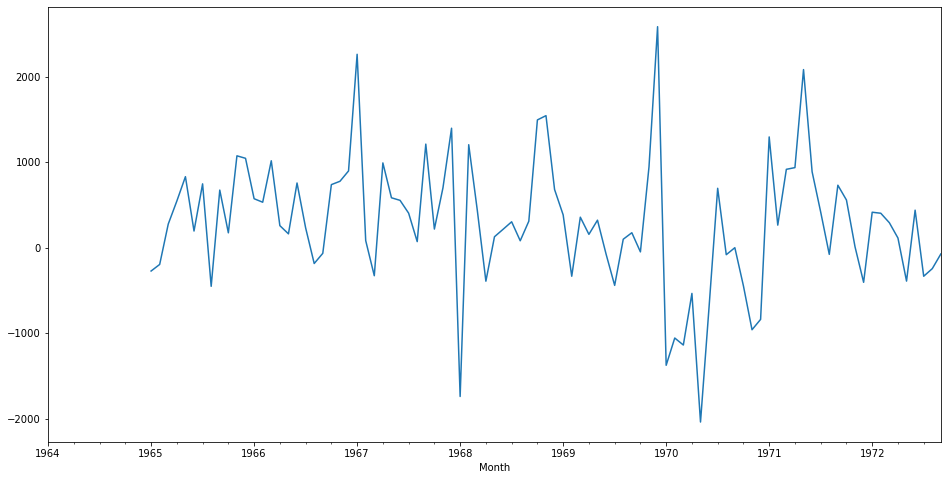

In [18]:
df['Sales_12_Difference'].plot(figsize=(16,8))

#### Auto Regressive Model
An autoregressive model is a time-series model that describes how a particular variable’s past values influence its current value.

Formula you can see from - https://otexts.com/fpp2/AR.html

y(t) = c + ϕ1y(t-1) + ϕ2y(t-2) + .....+ ϕpy(t-p) + ε(t)


where  ε(t) is white noise. This is like a multiple regression but with lagged values of  
y(t) as predictors. We refer to this as an AR(p) model, an autoregressive model of order p.

AR(p) — autoregression model, i.e., regression of the time series onto itself. Basic assumption — current series values depend on its previous values with some lag (or several lags). The maximum lag in the model is referred to as p. To determine the initial p you need to have a look at PACF plot — find the biggest significant lag, after which most other lags are becoming not significant.

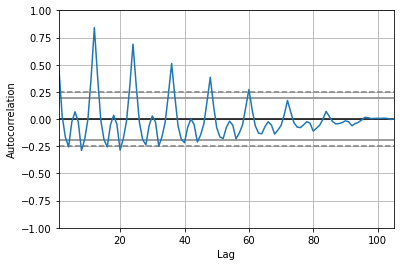

In [19]:
## Autocorrelation Plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

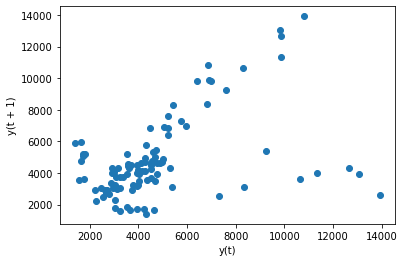

In [20]:
#lag_plot

from pandas.plotting import lag_plot
lag_plot(df['Sales'])

### Moving Average Model (MA)

MA(q) — moving average model. Without going into detail it models the error of the time series, again the assumption is — current error depends on the previous with some lag, which is referred to as q. Initial value can be found on ACF plot with the same logic.

### Integration (I)

I(d)— order of integration. It is simply the number of nonseasonal differences needed for making the series stationary. In our case it’s just 1, because we used first differences.

### ARMA
AR(p) + MA(q) = ARMA(p,q)

### ARIMA
AR(p) + I +  MA(q) = ARIMA(p,d,q)

ARIMA model which knows how to handle non-stationary data with the help of nonseasonal differences.

### ACF & PACF

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

Both the ACF and PACF start with a lag of 0, which is the correlation of the time series with itself and therefore results in a correlation of 1.

The difference between ACF and PACF is the inclusion or exclusion of indirect correlations in the calculation.

Furthermore, you will see a blue area in the ACF and PACF plots, which depicts the 95% confidence interval and is in indicator for the significance threshold. That means, anything within the blue area is statistically close to zero and anything outside the blue area is statistically non-zero.

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\rahnandi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


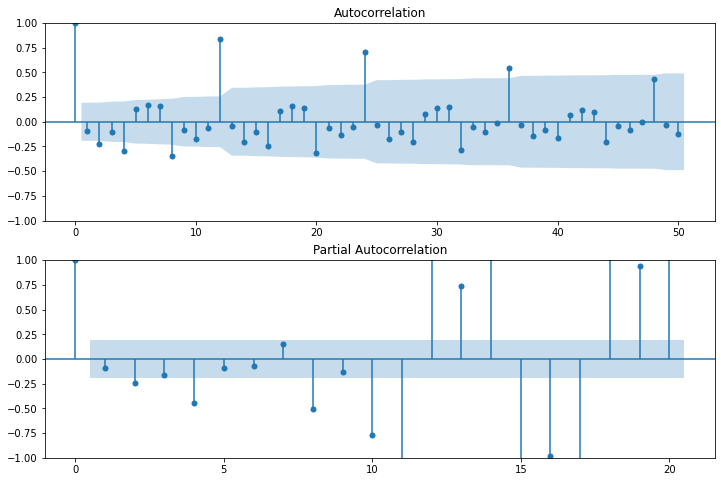

In [23]:
### ACF and PACF for Sales_First_Difference

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
plot_acf(df['Sales_First_Difference'].iloc[1:], lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Sales_First_Difference'].iloc[1:], lags=20, ax=ax2)

C:\Users\rahnandi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


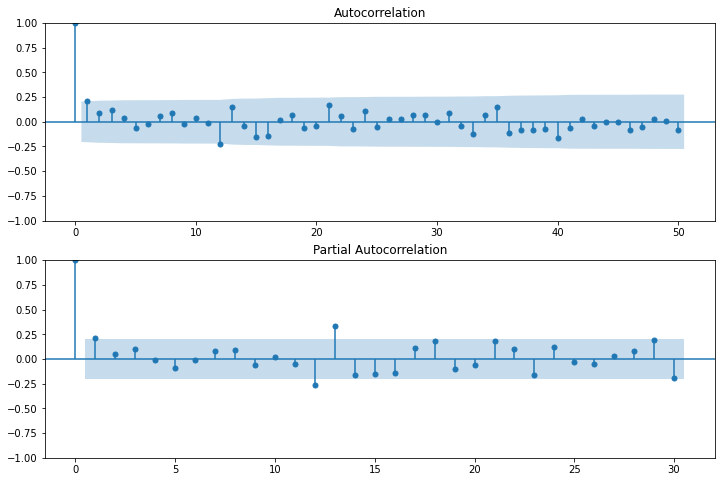

In [24]:
### ACF and PACF for Sales_12_Difference

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
plot_acf(df['Sales_12_Difference'].iloc[13:], lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Sales_12_Difference'].iloc[13:], lags=30, ax=ax2)

### Model

#### Now check ARIMA  as data is not stationary 

In [25]:
from statsmodels.tsa.arima.model import ARIMA

In [26]:
#p=1, d=1, q=1

model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\rahnandi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rahnandi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rahnandi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [27]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Tue, 08 Nov 2022   AIC                           1911.627
Time:                        10:31:34   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.314      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

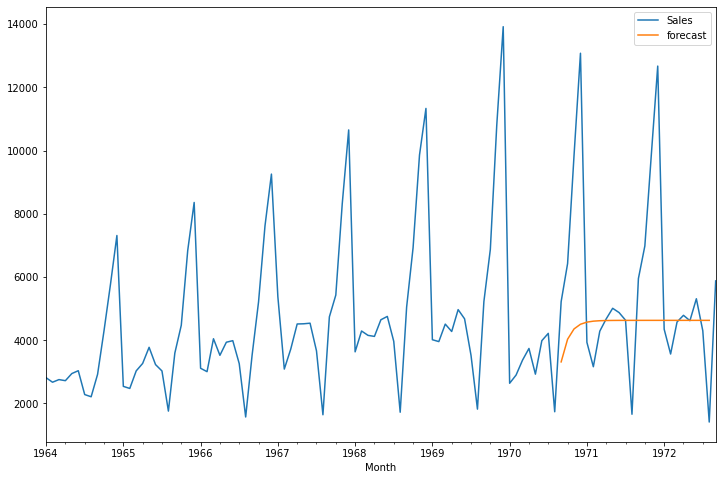

In [28]:
df['forecast']=model_fit.predict(start=80,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [29]:
#p=12, d=1, q=12

model=ARIMA(df['Sales'],order=(12,1,12))
model_fit=model.fit()

C:\Users\rahnandi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rahnandi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rahnandi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rahnandi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\rahnandi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood opt

<AxesSubplot:xlabel='Month'>

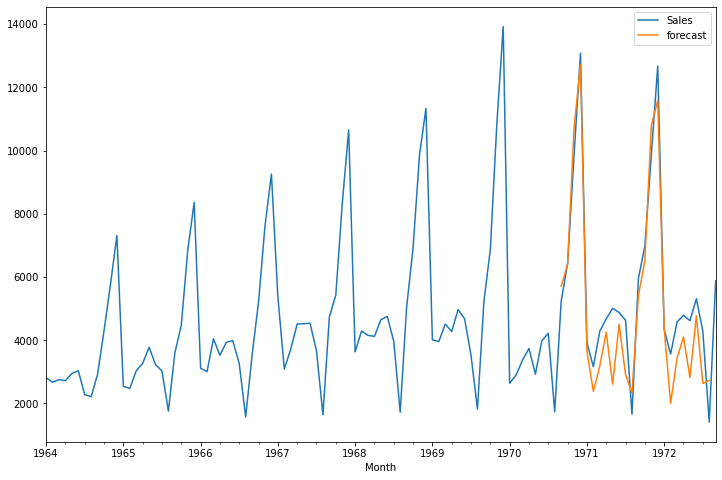

In [30]:
df['forecast']=model_fit.predict(start=80,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

#### Auto Arima Forecast (using pmdarima package)

In [31]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm


model = pm.auto_arima(df['Sales'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1952.912, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2104.630, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1951.109, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2012.608, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1952.983, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1949.722, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1947.983, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1950.793, Time=0.15 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1926.802, Time=0.38 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1926.054, Time=0.32 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1925.737, Time=0.31 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1998.274, Time=0.19 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1926.708, Time=0.29 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=1966.141, Time=0.20 sec
 ARIMA(2,0,3)(0,0,0)[0]          

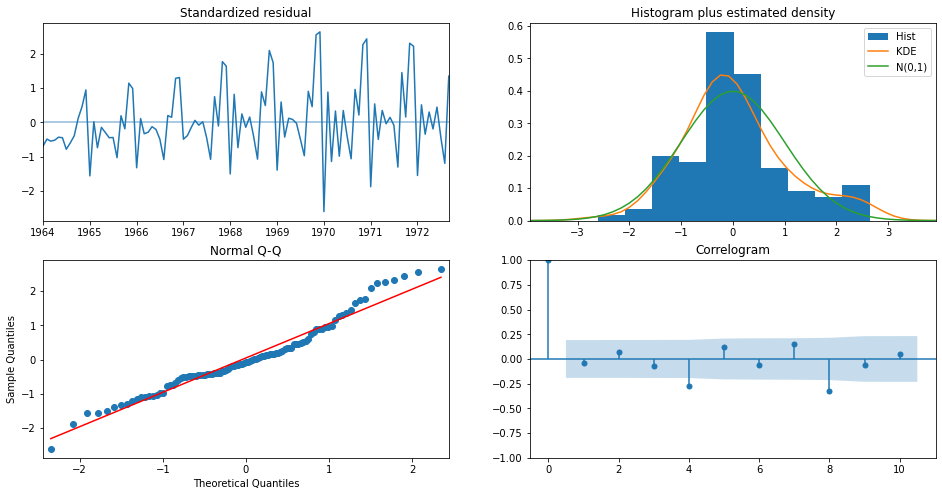

In [32]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

#### automatically build SARIMA model 

In [33]:
# Seasonal - fit stepwise auto-ARIMA

model = pm.auto_arima(df['Sales'], start_p=1, start_q=1,
                      test='adf',          # use adftest to find optimal 'd'
                      max_p=3, max_q=3,  # maximum p and q
                      m=12,                # frequency of series
                      d=None,              # let model determine 'd'
                      seasonal=True,       # Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=1501.191, Time=0.22 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1500.884, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1498.757, Time=0.15 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1498.942, Time=0.33 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1511.271, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1499.959, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1499.625, Time=0.30 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=1500.741, Time=0.26 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1499.028, Time=0.14 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=1501.490, Time=0.53 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1500.866, Time=0.23 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1500.295, Time=0.43 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=1500.747, Time=0.20 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1498.167, Time=0.46 sec
 ARIMA(0,0,1)(0,1,0

#### SARIMAX - Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [35]:
model=SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\rahnandi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rahnandi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Month'>

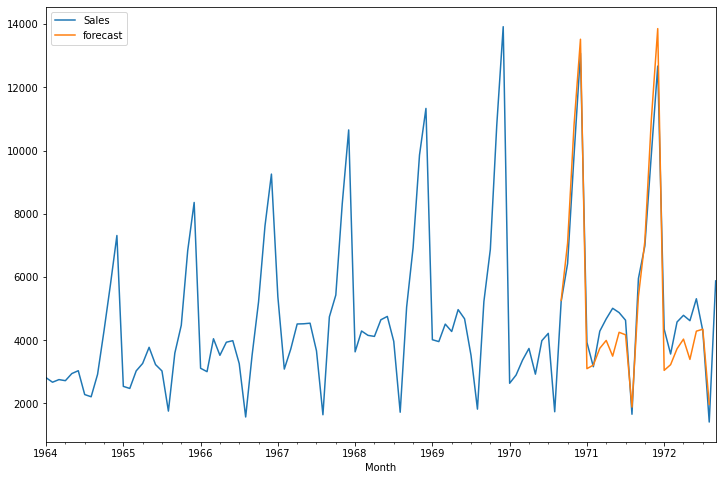

In [36]:
df['forecast']=results.predict(start=80,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [37]:
model=SARIMAX(df['Sales'],order=(0, 0, 1),seasonal_order=(1,1,0,12))
results=model.fit()

C:\Users\rahnandi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rahnandi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Month'>

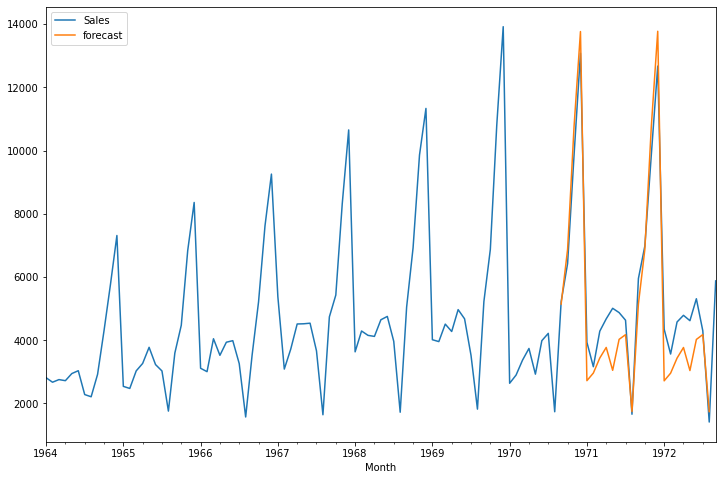

In [38]:
df['forecast']=results.predict(start=80,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

### prediction

In [39]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [40]:
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [41]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df

,Sales,Sales_First_Difference,Sales_12_Difference,forecast
1972-10-01,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN,NaN
1973-03-01,NaN,NaN,NaN,NaN
1973-04-01,NaN,NaN,NaN,NaN
1973-05-01,NaN,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN,NaN
1973-07-01,NaN,NaN,NaN,NaN


In [42]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

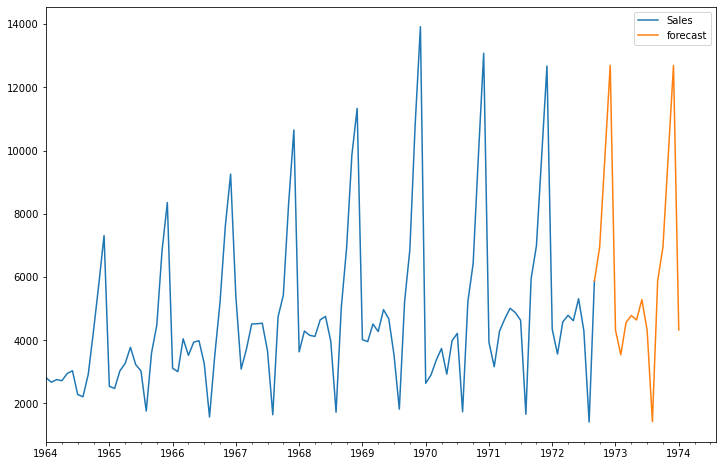

In [43]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 

### WILL DO FURTHER !